In [1]:
# 패키지 임포트
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 초기 상태의 미로

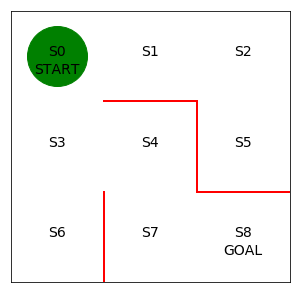

In [2]:
# 전체 그림의 크기 및 그림을 나타내는 변수 선언

fig = plt.figure(figsize=(5,5))
ax = plt.gca()

# 붉은 벽 (통과 못하는 벽)
plt.plot([1,1],[0,1], color='red', linewidth=2)
plt.plot([1,2],[2,2], color='red', linewidth=2)
plt.plot([2,2],[2,1], color='red', linewidth=2)
plt.plot([2,3],[1,1], color='red', linewidth=2)

# 상태를 의미하는 문자열(S0 ~ S8)
plt.text(0.5, 2.3, "START", size=14, ha='center')
plt.text(0.5, 2.5, "S0", size=14, ha='center') # 시작지점
plt.text(1.5, 2.5, "S1", size=14, ha='center')
plt.text(2.5, 2.5, "S2", size=14, ha='center')
plt.text(0.5, 1.5, "S3", size=14, ha='center')
plt.text(1.5, 1.5, "S4", size=14, ha='center')
plt.text(2.5, 1.5, "S5", size=14, ha='center')
plt.text(0.5, 0.5, "S6", size=14, ha='center')
plt.text(1.5, 0.5, "S7", size=14, ha='center')
plt.text(2.5, 0.5, "S8", size=14, ha='center') # 도착지점
plt.text(2.5, 0.3, "GOAL", size=14, ha='center')

# 그림을 그릴 범위
ax.set_xlim(0,3)
ax.set_ylim(0,3)

#눈금 제거
plt.tick_params(axis='both', which='both', bottom=False, top = False, 
                labelbottom = False, right= False, left = False, labelleft = False)

# S0에 녹색 원으로 현재위치 표시
line, =ax.plot([0.5],[2.5], marker='o', color = 'g', markersize=60)

# 에이전트 구현

In [3]:
## 정책을 결정하는 파라미터  theta의 초깃값 theta_0 설정

In [4]:
#줄은 S0 ~ S7, 열은 행동 방향(순서: 상, 우 하, 좌)을 나타낸다

theta_0 = np.array([[np.nan, 1,1, np.nan], # S0
                    [np.nan, 1, np.nan, 1], # S1
                    [np.nan, np.nan, 1,1], # S2
                    [1,1,1,np.nan], # S3
                    [np.nan, np.nan, 1,1], # S4
                    [1, np.nan, np.nan, np.nan], # S5
                    [1, np.nan, np.nan, np.nan], # S6
                    [1,1, np.nan, np.nan], #S7
                    #S8은 목표 지점이므로 정책 없음
                   ])
# theta_0를 변환해서 정책 pi_theta (s,a)를 구해야 함

In [5]:
# 단순하게 이동 방행에 대한 theta 갑의 비율을 계산해서 확률로 삼는다

def simple_convert_into_pi_from_theta(theta):
    ''' 단순히 값의 비율을 계산 '''
    
    [m,n] = theta.shape # theta의 행렬 크기를 구함
    pi = np.zeros((m,n))
    
    for i in range(0,m):
        pi[i,:] = theta[i,:] / np.nansum(theta[i,:]) # 비율 계산
    
    pi = np.nan_to_num(pi) # nan을 0으로 변환
    
    return pi

In [6]:
test = theta_0
[m,n] = test.shape
print([m,n])

pi = np.zeros((m,n))
print(pi.shape)

for i in range(0,m):
    print('---------------------')
    pi[i,:] = test[i,:] / np.nansum(test[i,:])
    print(pi)
    print('---------------------')
pi = np.nan_to_num(pi)

print(pi)

[8, 4]
(8, 4)
---------------------
[[nan 0.5 0.5 nan]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]
---------------------
---------------------
[[nan 0.5 0.5 nan]
 [nan 0.5 nan 0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]
---------------------
---------------------
[[nan 0.5 0.5 nan]
 [nan 0.5 nan 0.5]
 [nan nan 0.5 0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]
---------------------
---------------------
[[       nan 0.5        0.5               nan]
 [       nan 0.5               nan 0.5       ]
 [       nan        nan 0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333        nan]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.       

In [7]:
# 초기 정책 pi_0을 구함
pi_0 = simple_convert_into_pi_from_theta(theta_0)
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

## 1단계 이동 후의 상태 s를 계산하는 함수

In [8]:
def get_next_s(pi, s):
    direction = ["up","right","down","left"]
    
    # pi[s,:]의 확률에 따라, direction의 값이 선택된다
    next_direction = np.random.choice(direction, p=pi[s,:])
    
    #위로 이동하면 상태값이 3만큼 줄어든다
    if next_direction == "up":
        s_next = s - 3
    
    #오른쪽으로 이동하면 상태값이 1만큼 늘어난다
    elif next_direction == "right":
        s_next = s + 1
    
    #아래로 이동하면 상태값이 3만큼 늘어난다
    elif next_direction == "down":
        s_next = s + 3
        
    #왼쪽으로 이동하면 상태값이 1만큼 늘어난다
    elif next_direction == "left":
        s_next = s - 1
        
    return s_next

## 반복해서 실행하는 함수
에이전트가 목표지점에 도달할때까지 정책에 따라 get_next_s 함수로 에이전트를 계속 이동시킴

while문으로 진행하면서 상태 이력을 state_history에 계속 저장하고 마지막에 반환

In [9]:
def goal_maze(pi):
    s = 0 # 출발 지점
    state_history = [0] #에이전트의 경로를 기록하는 리스트, 처음 위치는 S0 이여서 0
    
    while(1):
        next_s = get_next_s(pi,s)
        state_history.append(next_s) # 경로 리스트에 다음 상태를 추가
        
        if next_s ==8:
            #목표지점에 이르면 종료
            break
        else: 
            s=next_s #아니면 다음지점으로 이동
        
    return state_history

In [10]:
#목표 지점에 이를때까지 미로 안을 이동

state_history = goal_maze(pi_0)

print(state_history)
print("목표 지점에 이르기까지 걸린 단계 수는 ", int(len(state_history)-1), "입니다.")

[0, 1, 2, 1, 0, 3, 4, 7, 8]
목표 지점에 이르기까지 걸린 단계 수는  8 입니다.


## 에이전트 이동과정 시각화

In [11]:
from matplotlib import animation
from IPython.display import HTML

In [12]:
def init():
    """배경 이미지 초기화"""
    line.set_data([],[])
    return (line,)

def animate(i):
    state = state_history[i] #현재 위치
    
    # 상태의 x 좌표는 state를 3으로 나눈 나머지 + 0.5
    x = (state % 3) + 0.5 
    #y좌표 : 2.5에서 상태의 3으로 나눈 몫을 뺌
    y= 2.5 -int(state / 3)
    
    line.set_data(x,y)
    return(line,)

In [13]:
# 초기화 함수와 프레임 단위 이미지 생성 함수를 사용해 애니메이션 생성
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history), interval=200, repeat=False)
HTML(anim.to_jshtml())

# 정책 반복 구현

## 정책 경사 알고리즘에 다라 에이전트 이동시키기

In [15]:
# 정책 파라미터 theta를 행동정책 pi로 변환(소프트맥스 함수 사용)하는 함수

def softmax_convert_into_pi_from_theta(theta):
    """비율 계산에 소프트맥스 함수 사용"""

    beta = 1.0
    [m,n] = theta.shape # theta의 행렬크기
    pi = np.zeros((m,n))

    exp_theta = np.exp(beta*theta) # theta를 exp(theta)로 변환

    for i in range(0,m):
        # 소프트맥스로 계산하는 코드
        pi[i,:] = exp_theta[i,:] / np.nansum(exp_theta[i,:])

    pi = np.nan_to_num(pi) #nan을 0으로 변환

    return pi

In [16]:
#초기 정책 pi_o을 계산
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


## 1단계 이동 후의 상태 s를 계산하는 함수

In [17]:
def get_action_and_next_s(pi, s):
    direction = ["up","right","down","left"]

    # pi[s,:]의 확률에 따라, direction의 값이 선택된다
    next_direction = np.random.choice(direction, p=pi[s,:])

    #위로 이동하면 상태값이 3만큼 줄어든다
    if next_direction == "up":
        action = 0
        s_next = s - 3

    #오른쪽으로 이동하면 상태값이 1만큼 늘어난다
    elif next_direction == "right":
        action = 1
        s_next = s + 1

    #아래로 이동하면 상태값이 3만큼 늘어난다
    elif next_direction == "down":
        action= 2
        s_next = s + 3

    #왼쪽으로 이동하면 상태값이 1만큼 늘어난다
    elif next_direction == "left":
        action = 3
        s_next = s - 1

    return [action, s_next]

## 반복해서 실행하는 함수

In [18]:
def goal_maze_ret_s_a(pi):
    s = 0 # 시작 지점
    s_a_history =[[0,np.nan]] # 에이전트의 행동 및 상태의 히스토리를 기록하는 리스트

    while(1):
        # 목표 지점에 이를 때까지 반복
        [action, next_s] = get_action_and_next_s(pi,s)
        s_a_history[-1][1] = action # 현재 상태(마지막이므로 인덱스가 -1)를 히스토리에 추가

        s_a_history.append([next_s, np.nan])
        # 다음 상태를 히스토리에 추가, 행동은 아직 알 수 없으므로 nan으로 둔다

        if next_s == 8:
            # 목표 지점에 이르면 종료
            break
        else:
            s = next_s

    return s_a_history

In [19]:
# 초기 정책으로 미로 빠져나오기
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("목표 지점에 이르기까지 걸린 단계 수는 ", int(len(s_a_history)-1), "입니다.")

[[0, 1], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 1], [2, 3], [1, 3], [0, 1], [1, 3], [0, 2], [3, 1], [4, 3], [3, 0], [0, 2], [3, 0], [0, 1], [1, 1], [2, 3], [1, 1], [2, 3], [1, 1], [2, 3], [1, 3], [0, 2], [3, 0], [0, 1], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 3], [0, 2], [3, 1], [4, 2], [7, 0], [4, 2], [7, 0], [4, 3], [3, 2], [6, 0], [3, 1], [4, 2], [7, 1], [8, nan]]
목표 지점에 이르기까지 걸린 단계 수는  56 입니다.


## 정책경사 알고리즘으로 정책 수정

In [20]:
#theta를 수정하는 함수

def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 학습률
    T = len(s_a_history) - 1 # 목표 지점에 이르기까지 걸린 단계 수

    [m,n] = theta.shape #theta의 행렬 크기
    delta_theta = theta.copy() # △theta를 구할 준비, 포인터 참조이므로 delta_theta = theta로는 안됨

    #delta_theta를 요소 단위로 계산
    for i in range(0,m):
        for j in range(0,n):
            if not(np.isnan(theta[i,j])): #theta가 nan이 아닌 경우
                # 히스토리에서 상태 i 인것만 모아오는 리스트 컴프리헨션
                SA_i = [SA for SA in s_a_history if SA[0] == i]

                #상태 i에서 행동 j를 취한 경우만 모음
                SA_ij = [SA for SA in s_a_history if SA == [i,j]]

                #상태 i에서 모든 행동을 취한 횟수
                N_i = len(SA_i)

                #상태 i에서 행동 j를 취한 횟수
                N_ij = len(SA_ij)

                delta_theta[i,j] = (N_ij - pi[i,j] * N_i) / T

    new_theta =theta + eta * delta_theta

    return new_theta

In [21]:
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.5        0.5        0.        ]
 [0.         0.50133928 0.         0.49866072]
 [0.         0.         0.5        0.5       ]
 [0.33372992 0.33372992 0.33254016 0.        ]
 [0.         0.         0.50044643 0.49955357]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.50044643 0.49955357 0.         0.        ]]


## 정책 경사 알고리즘으로 미로 빠져나오기

In [22]:
# 정책의 변화가 10^-4 보다 작아지면 학습을 종료
stop_epsilon = 10**-4 

theta = theta_0
pi = pi_0

is_continue = True
count = 1
history = []
delta_history = []

while is_continue: #is_continue가 False가 될 때까지 반복
    # 정책π에 따라 미로를 탐색한 히스토리를 구함
    s_a_history = goal_maze_ret_s_a(pi) 
    
    #파라미터 θ를 수정
    new_theta = update_theta(theta, pi, s_a_history)
    
    #정책 π를 수정
    new_pi = softmax_convert_into_pi_from_theta(new_theta)
    
    #정책의 변화를 수정
    delta_pi = np.sum(np.abs(new_pi - pi))
    print(delta_pi)
    print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계 입니다.")
    history.append(len(s_a_history) - 1)
    delta_history.append(delta_pi)
    
    if delta_pi < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.014285471336347721
목표 지점에 이르기까지 걸린 단계 수는 14단계 입니다.
0.016522910398649893
목표 지점에 이르기까지 걸린 단계 수는 24단계 입니다.
0.032338262313956145
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.02020697381582426
목표 지점에 이르기까지 걸린 단계 수는 12단계 입니다.
0.009373976329407951
목표 지점에 이르기까지 걸린 단계 수는 70단계 입니다.
0.01349458836092754
목표 지점에 이르기까지 걸린 단계 수는 42단계 입니다.
0.013339003790147574
목표 지점에 이르기까지 걸린 단계 수는 18단계 입니다.
0.021804259768909262
목표 지점에 이르기까지 걸린 단계 수는 18단계 입니다.
0.01797889827723348
목표 지점에 이르기까지 걸린 단계 수는 12단계 입니다.
0.024277763396578778
목표 지점에 이르기까지 걸린 단계 수는 8단계 입니다.
0.006600483972029614
목표 지점에 이르기까지 걸린 단계 수는 44단계 입니다.
0.00894517876269596
목표 지점에 이르기까지 걸린 단계 수는 28단계 입니다.
0.0103958218703184
목표 지점에 이르기까지 걸린 단계 수는 62단계 입니다.
0.031497174249074555
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0047959231988464746
목표 지점에 이르기까지 걸린 단계 수는 64단계 입니다.
0.013037541160325183
목표 지점에 이르기까지 걸린 단계 수는 46단계 입니다.
0.035749349567089084
목표 지점에 이르기까지 걸린 단계 수는 8단계 입니다.
0.009557468467992936
목표 지점에 이르기까지 걸린 단계 수는 58단계 입니다.
0.0472556387323293
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.032

목표 지점에 이르기까지 걸린 단계 수는 14단계 입니다.
0.024733441597796446
목표 지점에 이르기까지 걸린 단계 수는 8단계 입니다.
0.01485910936459603
목표 지점에 이르기까지 걸린 단계 수는 24단계 입니다.
0.02896842169602795
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.02633818126733048
목표 지점에 이르기까지 걸린 단계 수는 10단계 입니다.
0.016230616902269707
목표 지점에 이르기까지 걸린 단계 수는 8단계 입니다.
0.026509729174881175
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.016288774797270672
목표 지점에 이르기까지 걸린 단계 수는 28단계 입니다.
0.019512974273024175
목표 지점에 이르기까지 걸린 단계 수는 18단계 입니다.
0.017365641750777733
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0209120652113724
목표 지점에 이르기까지 걸린 단계 수는 22단계 입니다.
0.0166910070051228
목표 지점에 이르기까지 걸린 단계 수는 20단계 입니다.
0.01671397397816371
목표 지점에 이르기까지 걸린 단계 수는 10단계 입니다.
0.011264824051314737
목표 지점에 이르기까지 걸린 단계 수는 24단계 입니다.
0.015541946117410416
목표 지점에 이르기까지 걸린 단계 수는 8단계 입니다.
0.028479614154076793
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.026415580054571064
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.010302890032964834
목표 지점에 이르기까지 걸린 단계 수는 48단계 입니다.
0.02346355239630074
목표 지점에 이르기까지 걸린 단계 수는 10단계 입니다.
0.028311187388623954
목표 지점에 이르기

0.016848890452123483
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.015307314311210324
목표 지점에 이르기까지 걸린 단계 수는 8단계 입니다.
0.016578071871856892
목표 지점에 이르기까지 걸린 단계 수는 18단계 입니다.
0.016657750315619058
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.01285606036160905
목표 지점에 이르기까지 걸린 단계 수는 12단계 입니다.
0.016923771875685167
목표 지점에 이르기까지 걸린 단계 수는 16단계 입니다.
0.011908278534567052
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.016595349663906744
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.01636629826220018
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.014704502535815178
목표 지점에 이르기까지 걸린 단계 수는 8단계 입니다.
0.017509089818560086
목표 지점에 이르기까지 걸린 단계 수는 22단계 입니다.
0.01952059895794614
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.02195372708192503
목표 지점에 이르기까지 걸린 단계 수는 10단계 입니다.
0.01627307388910143
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.01605034086482765
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.012041875492263876
목표 지점에 이르기까지 걸린 단계 수는 10단계 입니다.
0.01587413147544936
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.011322550679801702
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.015614453675101753
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.01971160310

0.016684240471962694
목표 지점에 이르기까지 걸린 단계 수는 10단계 입니다.
0.01618620633642469
목표 지점에 이르기까지 걸린 단계 수는 8단계 입니다.
0.010574276729975782
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.010189249313116572
목표 지점에 이르기까지 걸린 단계 수는 8단계 입니다.
0.010452219571655652
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.010320026944875924
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.010190050781693494
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.010062249681500324
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.009936582894910131
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.018661151935658704
목표 지점에 이르기까지 걸린 단계 수는 10단계 입니다.
0.009993618383539862
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.009868441828853047
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00974535982296261
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.017241861808206804
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.009612997316135755
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.009494311658569426
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.009377597285207942
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.009262816711781516
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.010873147904577732
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0168856865

0.003674853133575698
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.003644437885777202
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0036143839308958176
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.005946989047203852
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.003607869862544355
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.012089035093565514
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.005969881948118649
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.003612556669258249
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.003582955070959723
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.007237074967592835
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0035846599981115
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0072607626843228384
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.003587808425953104
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.007284077382106208
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.006209807481137947
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.007621116840678788
목표 지점에 이르기까지 걸린 단계 수는 10단계 입니다.
0.018046832774841884
목표 지점에 이르기까지 걸린 단계 수는 42단계 입니다.
0.003624446014511548
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0035945013765675132
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0035649

목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0019750728819000543
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.004748422494186708
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.005107970846084116
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.001997026135585743
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0019845444963821346
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.005105979015199734
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.005159039612469794
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.002001223668398229
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.001988701504663841
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0019762930652620775
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0062874161149298405
목표 지점에 이르기까지 걸린 단계 수는 8단계 입니다.
0.007163334393372564
목표 지점에 이르기까지 걸린 단계 수는 8단계 입니다.
0.0020223682474656765
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0020096489675532833
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0019970457975518677
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0019845573644767314
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00197218231508553
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.001959919315548203
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0019477670511210549
목표 지

0.0015369714538850804
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.001528455271235081
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0015200078871495312
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0015116285785967826
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0015033166318269842
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.005650989409269162
목표 지점에 이르기까지 걸린 단계 수는 8단계 입니다.
0.0015206595347879853
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0015122664528780042
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.004411969615026712
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0015187931482983225
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0015104073217236877
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0015020890907262718
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.006338942921312485
목표 지점에 이르기까지 걸린 단계 수는 8단계 입니다.
0.0015218402682122614
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0015134113945069333
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0015050507715062347
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.004151552495070272
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.004866851702391768
목표 지점에 이르기까지 걸린 단계 수는 8단계 입니다.
0.004538212724420579
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.


목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0040214295685022244
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.001257896505088077
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.004079885061638984
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0012657264742109986
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0012592079698719935
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0012527389409906844
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0012463188948469636
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0012399473447536544
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0012336238099731195
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.004082561089649474
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0012421397154971578
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0012357886813493257
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.003782948796269593
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0041364059519480995
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0012606202858726906
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0012541074691297394
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0012476443676037036
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0037552448143973044
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.00124799811495748

0.0008195483662804329
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0008161427633107191
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0008127580403050477
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0008093940289336868
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0008060505625429246
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0030491886345102373
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0008135481605224468
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0008101738265769015
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.014379621165271292
목표 지점에 이르기까지 걸린 단계 수는 18단계 입니다.
0.0008089110293131793
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0008055673244062381
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0008022440248360158
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0031377425831164776
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.000807882595594181
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0008045437596509511
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0008012253002782146
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0007979270538374245
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0007946488583160452
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0007913905533027676
목표 지점에 이르기까지 걸린 단계 수는 4단계

0.0005482713780814163
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0005463990642678163
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0005445361986188106
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0025101341210323064
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.002490586348211296
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0024921004325258976
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.000561408436319865
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0005594691605768365
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0005575397823020349
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.000555620234974321
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0005537104526238158
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0068515026582273535
목표 지점에 이르기까지 걸린 단계 수는 10단계 입니다.
0.0005642523411886688
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0005622996367342405
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0005603569133380004
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0005584241038330724
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.000556501141612032
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0005545879606198567
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0005526844953493669
목표 지점에 이르기까지 걸린 단계 수는 4단계 입

목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0004752900129341049
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0025642057747357894
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0004811088564026199
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.000479550684340406
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0004780000282200332
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0004764568399092915
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00047492107166281425
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00047339267611276256
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0004718716062703694
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0004703578155196182
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00046885125761478297
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0004673518866754843
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0004658596571844899
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.000464374523984349
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0004628964422727991
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00046142536760088865
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.000459961255869102
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00045850406332289054
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00045705374

0.000369471537767143
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0003684263022403385
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00036738545456112964
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00036634897037167435
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00036531682548410563
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.002171208152239038
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0003696000889427051
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.000368552211960773
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0003675087496749878
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0022136487350734035
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0003720760445738436
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0003710149781849664
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0022601959007806614
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0003758874123606752
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0003748067021104619
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0003737306275642914
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0003726591622808216
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00037159228000739966
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00037052995467688754
목표 지점에 이르기까지 걸린 단계 수는 

0.000293474726819426
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0028268858120658186
목표 지점에 이르기까지 걸린 단계 수는 10단계 입니다.
0.0002993920264216486
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.01251506742372396
목표 지점에 이르기까지 걸린 단계 수는 20단계 입니다.
0.00029956549383474904
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0018026587549118817
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0003021057034553812
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0003013295172081751
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00030055629548460597
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0002997860232906921
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0002990186857264564
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00029825426798665844
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00029749275535710315
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00029673413321813433
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0002959783870385112
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00029522550238062287
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00029447546489650214
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0002937282603251261
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0002929838744976862
목표 지점에 이르기까지 걸린 단계

0.00026559731744707493
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0002649566690540901
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0002643183181423141
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00026368225380160246
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0002630484651881225
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00026241694152031453
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0002617876720793881
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00026116064621126145
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0002605358533248059
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00025991328288843193
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0002592929244346967
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00025867476755668875
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0002580588019071711
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0002574450172017802
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00025683340321420653
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0017288696308545744
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.00025987232250829564
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00025925132795915837
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00025863254150398224
목표 지점에 이르기까지 걸

목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00022252964456641322
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00022202585954115076
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00022152379435372294
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00022102344113513264
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00022052479205670814
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00022002783933735767
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00021953257524096742
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00021903899207407
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00021854708218880387
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00021805683797955153
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00021756825188539233
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00021708131638828107
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0002165960240122708
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00021611236732367242
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0002156303389335909
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00021514993149151715
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00021467113769104915
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.000214193950266426
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00

0.0002188881226079624
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00021838659215037137
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00021788681227360995
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0002173887747223789
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0002168924712885982
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0002163978938137627
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0017149576053607993
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.00022000119868045148
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0002194937603192254
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00021898810899742202
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00021848423619761845
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00021798213345310125
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0002174817923466417
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.001836343980351679
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0017658871210205242
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.00022605701985891485
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00022552304863811268
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00022499101366704397
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00022446090540593697
목표 지점에 이르기까지 걸린

0.00017825934116550042
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0001778840899535252
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00017751005434940917
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00017713722898792493
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00017676560853464862
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0001763951876866971
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0001760259611674024
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00017565792373278565
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00017529107016636507
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00017492539528175637
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.000174560893920225
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00017419756095346343
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00017383539127921802
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00017347437982631088
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00017311452154983135
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00017275581143291752
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00017239824448641444
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00017204181575099405
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00017168652029049374
목표 지점에 이르기

목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00016384634081806349
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0001635156944596594
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0001631860755075456
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00016285747960980215
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00016252990243604062
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00016220333968146143
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0001618777870627565
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0012769845940159424
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.00016347402972632583
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0001631453839533066
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00016281775343527163
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00016249113390365277
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00016216552111193022
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0001618409108382901
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00016151729888120268
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0001611946810631086
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0014955740212179904
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.00016408715389790163
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.000

0.0001535904734642126
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00015329052828466118
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00015299148304039056
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00015269333405929994
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0001523960776886428
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0001520997102931656
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00015180422825805673
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0001515096279860982
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0001512159058989597
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0001509230584367787
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0001506310820575934
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00015033997323825841
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00015004972847366786
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0001497603442763562
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00014947181717639597
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00014918414372178807
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0011807523802051835
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.00015032165549094464
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00015003245900838819
목표 지점에 이르기까지 걸

0.0001421692795372468
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0011564817036935522
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0011877893066216134
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.00014479689894938974
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00014452621691561293
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00014425630656430578
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00014398716491829423
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00014371878901671062
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0001434511759122372
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0012195215128332458
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.00014495931394766307
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00014468867922540554
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00014441881387936874
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00014414971495498898
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00014388137951179027
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0001436138046250566
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00014334698738137364
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00014308092488555905
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00014281561425163146
목표 지점에 이르기까

목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00012116498581219402
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00012095909885753188
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00012075374271933517
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00012054891555342458
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00012034461552678372
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00012014084081282683
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00011993758959254197
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.001270960888901232
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.00012199903997131903
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00012179027060637768
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00012158204444216551
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00012137435957343401
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00012116721410106862
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00012096060613589824
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.001334603220626042
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0013663221399262092
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.0001258805765696428
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0001256596603576455
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00

0.00010442521406556736
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00010425844197729447
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.000104092075947965
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00010392611464410742
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00010376055673451054
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00010359540089513973
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00010343064580794169
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00010326629015934216
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00010310233264116883
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00010293877195104856
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0001027756067925184
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00010261283587304111
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00010245045790680495
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00010228847161277907
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00010212687571425558
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.00010196566894163372
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0012366342945078802
목표 지점에 이르기까지 걸린 단계 수는 6단계 입니다.
0.00010396355425134132
목표 지점에 이르기까지 걸린 단계 수는 4단계 입니다.
0.0012653993013812172
목표 지점에 이르기

In [23]:
#학습이 끝난 정책을확인
np.set_printoptions(precision=3, suppress=True) # 유효 자릿수=3, 지수는 표시하지 않도록 설정
print(pi)

[[0.    0.01  0.99  0.   ]
 [0.    0.279 0.    0.721]
 [0.    0.    0.383 0.617]
 [0.012 0.974 0.014 0.   ]
 [0.    0.    0.985 0.015]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.014 0.986 0.    0.   ]]


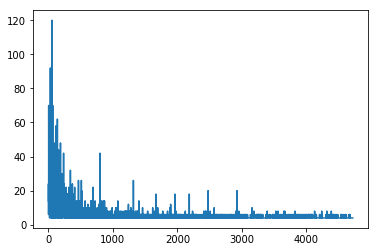

In [24]:
i = range(len(history))
plt.plot(i, history)

## 에이전트 이동과정 시각화

In [25]:
def init():
    """배경 이미지 초기화"""
    line.set_data([],[])
    return (line,)

def animate(i):
    #프레임 단위로 이미지 생성
    state = s_a_history[i][0] #현재 위치
    
    # 상태의 x 좌표는 state를 3으로 나눈 나머지 + 0.5
    x = (state % 3) + 0.5 
    #y좌표 : 2.5에서 상태의 3으로 나눈 몫을 뺌
    y= 2.5 -int(state / 3)
    
    line.set_data(x,y)
    return(line,)

In [26]:
# 초기화 함수와 프레임 단위 이미지 생성 함수를 사용해 애니메이션 생성
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history), interval=200, repeat=False)
HTML(anim.to_jshtml())

# 가치 반복 알고리즘 : Sarsa